# EE16A Homework 11

## Question 1: Mechanical Correlation

In [51]:
import numpy as np

def vector_compare(desired_vec, test_vec):
    """This function compares two vectors, returning a number.
    The test vector with the highest return value is regarded as being closest to the desired vector."""
    # Hint: Use transpose for the first argument of np.dot
    # YOUR CODE HERE
    return np.dot(np.transpose(desired_vec), test_vec)

def crossCorrelate(vec1, vec2):
    output = []
    for i in range(len(vec2)):
        output.append(vector_compare(vec1, vec2))
        vec2 = np.roll(vec2, 1)
    return output
    
def autoCorrelate(vec1):
    return crossCorrelate(vec1, vec1)
    
array1 = np.array([2, -2, 2, -2, -2, -2, 2, -2, 2, 2])
array2 = np.array([1, 2, 3, 4, 5, 6, 7, 6, 5, 4])

print (autoCorrelate(array1))
print (crossCorrelate(array1, array2))

[40, -8, 8, -8, 8, -40, 8, -8, 8, -8]
[-6, 6, 10, 22, 18, 6, -6, -10, -22, -18]


## Question 2: GPS Receivers

In [52]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sys

Populating the interactive namespace from numpy and matplotlib


In [53]:
## RUN THIS FUNCTION BEFORE YOU START THIS PROBLEM
## This function will generate the gold code associated with the satellite ID using linear shift registers
## The satellite_ID can be any integer between 1 and 24
def Gold_code_satellite(satellite_ID):
    codelength = 1023
    registerlength = 10
    
    # Defining the MLS for G1 generator
    register1 = -1*np.ones(registerlength)
    MLS1 = np.zeros(codelength)
    for i in range(codelength):
        MLS1[i] = register1[9]
        modulo = register1[2]*register1[9]
        register1 = np.roll(register1,1)
        register1[0] = modulo
    
    # Defining the MLS for G2 generator
    register2 = -1*np.ones(registerlength)
    MLS2 = np.zeros(codelength)
    for j in range(codelength):
        MLS2[j] = register2[9]
        modulo = register2[1]*register2[2]*register2[5]*register2[7]*register2[8]*register2[9]
        register2 = np.roll(register2,1)
        register2[0] = modulo
    
    delay = np.array([5,6,7,8,17,18,139,140,141,251,252,254,255,256,257,258,469,470,471,472,473,474,509,512,513,514,515,516,859,860,861,862])
    G1_out = MLS1;
    shamt = delay[satellite_ID - 1]
    G2_out = np.roll(MLS2,shamt)
    
    CA_code = G1_out * G2_out
    
    return CA_code

### Part (a)

TypeError: an integer is required (got type function)

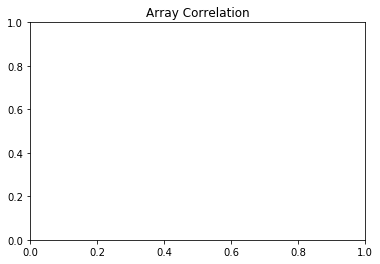

In [58]:
# Can see huge amount of noise

def array_correlation(array1, array2):
    """ This function should return two arrays or a matrix with one row corresponding to 
    the offset and other to the correlation value
    """
    
    return np.correlate(array1, array2, full)
    
# Plot the auto-correlation of satellite 10 with itself. Your signal should be centered
# at offset = 0.
# Use plt.plot or plt.stem to plot.

# Plot the autocorrelation:
plt.title("Array Correlation")
corr = array_correlation(Gold_code_satellite(10), Gold_code_satellite(10))
plt.plot(corr)

### Part (b)

TypeError: an integer is required (got type function)

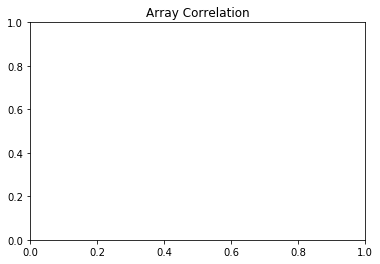

In [59]:
plt.title("Array Correlation")
corr = array_correlation(Gold_code_satellite(10), Gold_code_satellite(13))
plt.plot(corr)

### Part (c)

In [ ]:
## THIS IS A HELPER FUNCTION FOR PART C
def integernoise_generator(length_of_noise):
    noise_array = np.random.randint(2, size = length_of_noise)
    noise_array = 2 * noise_array - np.ones(size(noise_array))
    return noise_array

plt.title("Array Correlation")
corr = array_correlation(Gold_code_satellite(10), Gold_code_satellite(13))
plt.plot(corr)

### Part (d)

In [ ]:
## THIS IS A HELPER FUNCTION FOR PART D
def gaussiannoise_generator(length_of_noise):
    noise_array = np.random.normal(0, 1, length_of_noise)
    return noise_array

plt.title("Array Correlation")
corr = array_correlation(Gold_code_satellite(10), gaussiannoise_generator(1023))
plt.plot(corr)

### Part (e)

In [ ]:
## USE 'np.load' FUNCTION TO LOAD THE DATA
## USE DATA1.NPY AS THE SIGNAL ARRAY

# YOUR CODE HERE
np.load(data1.npy)

### Part (f)

In [ ]:
## USE DATA2.NPY AS THE SIGNAL ARRAY

# YOUR CODE HERE
np.load(data2.npy)

### Part (g)

In [ ]:
## USE DATA3.NPY AS THE SIGNAL ARRAY

# YOUR CODE HERE
np.load(data3.npy)

## Question 3: Finding Signals in Noise

In [26]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.linalg as la
import pylab as plt
import numpy.random

In [27]:
N = 1000

def rand_vector(n): # returns a random {+1, -1} vector of length n
    return np.random.randint(2, size=n)*2 - 1.0

def rand_normed_vector(n): # returns a random normalized vector of length n
    x = rand_vector(n)
    return x / la.norm(x)

def cross_corr(f, g):
    # returns the cross-correlation (a vector of all the inner products of 'g' with shifted versions of 'f')
    C = la.circulant(f)
    corr = C.T.dot(g)
    return corr

### Part (a)

0.028
0.028


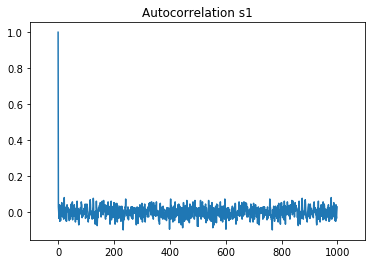

In [35]:
# Generate a random normalized vector for s1
# Running this cell again will generate a new random vector
s1 = rand_normed_vector(N)

# Compute all the inner products of s1 with shifted versions of s1
# (i.e., the cross-correlation of s1 with s1)
corr = cross_corr(s1, s1)

# The inner product <s1, s1^(1)> is:
print(corr[1])

# np.roll circularly shifts the signal,
# so the above inner product could be computed as:
print(np.dot(s1, np.roll(s1,1)))

# Plot the autocorrelation:
plt.title("Autocorrelation s1")
plt.plot(corr)

x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])

plt.show()

### Part (b)

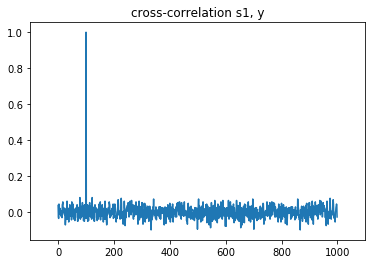

100


In [37]:
y = np.roll(s1, 100) # Received y = s1 shifted by 10

# Compute the cross-correlation (all the inner products of y with shifted versions of s1)
corr = cross_corr(s1, y)

# Plot
plt.title("cross-correlation s1, y")
plt.plot(corr)

x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

# Find the index of maximum correlation (inner product)
print(np.argmax(corr))

### Part (c)

In [40]:
# Generate a random normalized vector for s1
# and a random normalized vector for n
# Running this cell again will generate new random vectors
s1 = rand_normed_vector(N)
n = rand_normed_vector(N)

print(np.abs(np.dot(s1, n)))

0.054


### Part (d)

This is the code from part (b) but with the received signal $\vec{y}$, which is corrupted by noise.

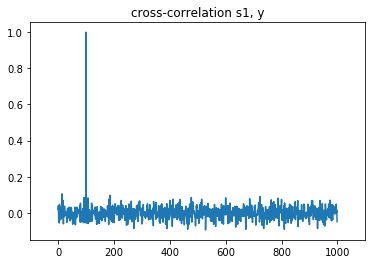

100

In [42]:
s1 = rand_normed_vector(N)
n = rand_normed_vector(N)
y = np.roll(s1, 100) + 0.1*n

corr = cross_corr(s1, y)

plt.title("cross-correlation s1, y")
plt.plot(corr)

x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

# Find the index of maximum correlation (inner product)
np.argmax(corr)

### Part (e)

Copy the code provided for part (d), but modify it appropriately, so that the noise is higher.
You should generate two cross-correlation plots, one for each noise level in the question.
(You can just copy the code from part (d) twice.)

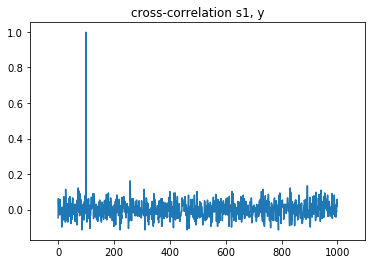

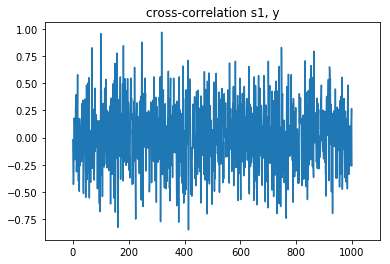

318

In [43]:
s1 = rand_normed_vector(N)
n = rand_normed_vector(N)
y = np.roll(s1, 100) + n

corr = cross_corr(s1, y)

plt.title("cross-correlation s1, y")
plt.plot(corr)

x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

# Find the index of maximum correlation (inner product)
np.argmax(corr)




s1 = rand_normed_vector(N)
n = rand_normed_vector(N)
y = np.roll(s1, 100) + 10*n

corr = cross_corr(s1, y)

plt.title("cross-correlation s1, y")
plt.plot(corr)

x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

# Find the index of maximum correlation (inner product)
np.argmax(corr)

### Part (f)

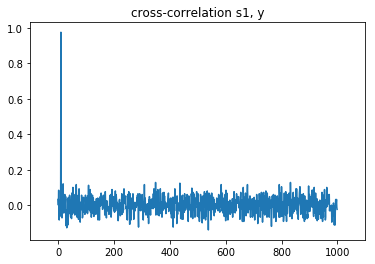

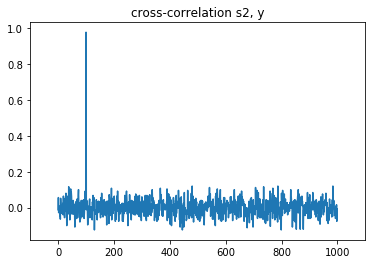

10 100


In [44]:
s1 = rand_normed_vector(N)
s2 = rand_normed_vector(N)

y = np.roll(s1, 10) + np.roll(s2, 100)

# Compute cross-correlations:
corr_s1_y = cross_corr(s1, y)
corr_s2_y = cross_corr(s2, y)

# Plot cross-correlations:
plt.title("cross-correlation s1, y")
plt.plot(cross_corr(s1, y))
x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

plt.title("cross-correlation s2, y")
plt.plot(cross_corr(s2, y))
x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

j = np.argmax(corr_s1_y) # find the first signal delay (max index of correlation)
k = np.argmax(corr_s2_y) # find the second signal delay
print(j, k)

### Part (g)

This is the same code as in part (f) but with a slight modification to how the received signal y generated.
Run the below cell a few times to test for different choices of random signals.

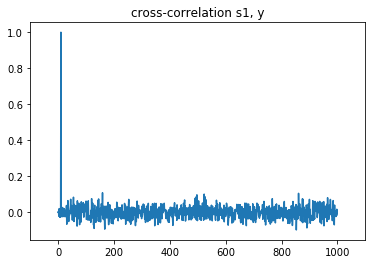

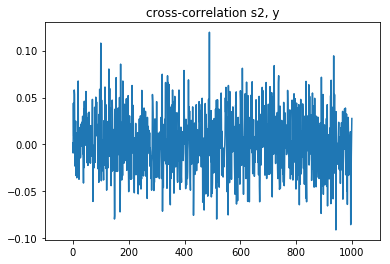

In [45]:
s1 = rand_normed_vector(N)
s2 = rand_normed_vector(N)

y = np.roll(s1, 10) + 0.1*np.roll(s2, 100)

# Compute cross-correlations:
corr_s1_y = cross_corr(s1, y)
corr_s2_y = cross_corr(s2, y)

# Plot cross-correlations:
plt.title("cross-correlation s1, y")
plt.plot(cross_corr(s1, y))
x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

plt.title("cross-correlation s2, y")
plt.plot(cross_corr(s2, y))
x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

### Part (h)

10


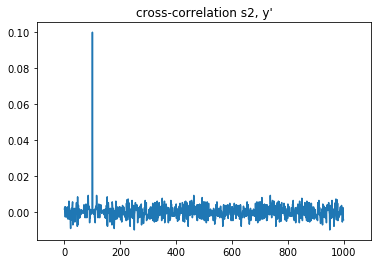

100


In [46]:
corr_s1_y = cross_corr(s1, y)
j = np.argmax(corr_s1_y) # find the first signal delay
print(j)

# Subtract out the contribution of the first signal
y_prime = y - np.roll(s1, j)

# Correlate the residual against the second signal
corr_s2_y = cross_corr(s2, y_prime)

# Plot 
plt.title("cross-correlation s2, y'")
plt.plot(corr_s2_y)
x1,x2,y1,y2 = plt.axis()
plt.axis([x1-50,x2+50,y1,y2])
plt.show()

k = np.argmax(corr_s2_y) # find the second signal delay by looking at the index of max correlation
print(k)

### Part (i)

In [47]:
s1 = rand_normed_vector(N)
s2 = rand_normed_vector(N)

y = 0.7*np.roll(s1, 10) + 0.5*np.roll(s2, 100)

corr_s1_y = cross_corr(s1, y)
j = np.argmax(corr_s1_y) # find the first signal delay

corr_s2_y = cross_corr(s2, y)
k = np.argmax(corr_s2_y) # find the second signal delay

print(j, k)

# Once we have found the shifts, estimate the coefficients as inner products:
a1 = np.dot(y, np.roll(s1, j))
a2 = np.dot(y, np.roll(s2, k))

print(a1, a2)

10 100
0.696 0.4944


### Part (j)

This is the same code as in part (i) but with noise added to the received signal $\vec{y}$.

In [48]:
s1 = rand_normed_vector(N)
s2 = rand_normed_vector(N)
n = rand_normed_vector(N)

y = 0.7*np.roll(s1, 10) + 0.5*np.roll(s2, 100) + 0.1*n

corr_s1_y = cross_corr(s1, y)
j = np.argmax(corr_s1_y) # find the first signal delay

corr_s2_y = cross_corr(s2, y)
k = np.argmax(corr_s2_y) # find the second signal delay

print(j, k)

# Once we have found the shifts, estimate the coefficients as inner products:
a1 = np.dot(y, np.roll(s1, j))
a2 = np.dot(y, np.roll(s2, k))

print(a1, a2)

10 100
0.7124 0.5188


## Question 5: Image Analysis

In [ ]:
def plot_circle(a, d, e):
    """
    You can use this function to plot circles with parameters a,d,e.
    The parameters are described in the homework pdf. 
    
    You can comment out the line that starts with `plt.title`
    because this makes assumptions regarding the title of your plot.
    """
    is_circle = d**2 + e**2 - 4*a > 0
    assert is_circle, "Not a circle"
    
    XLIM_LO = -1
    XLIM_HI = 3
    YLIM_LO = -2
    YLIM_HI = 2
    X_COUNT = 400
    Y_COUNT = 400
    
    x = np.linspace(XLIM_LO, XLIM_HI, X_COUNT)
    y = np.linspace(YLIM_LO, YLIM_HI, Y_COUNT)
    x, y = np.meshgrid(x, y)
    f = lambda x,y: a*(x**2 + y**2) + d*x + e*y
    
    c1 = plt.contour(x, y, f(x,y), [1], colors='r')
    plt.axis('scaled')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(r'${:.2f}(x^2 + y^2) {:+.2f}x {:+.2f}y$'.format(a,d,e))

In [ ]:
def plot_ellipse(a, b, c, d, e):
    """
    You can use this function to plot ellipses with parameters a-e.
    The parameters are described in the homework pdf. 
    
    You can comment out the line that starts with `plt.title`
    because this makes assumptions regarding the title of your plot.
    """
    is_ellipse = b**2 - 4*a*c < 0
    assert is_ellipse, "Not an ellipse"
    
    XLIM_LO = -1
    XLIM_HI = 3
    YLIM_LO = -2
    YLIM_HI = 2
    X_COUNT = 400
    Y_COUNT = 400
    
    x = np.linspace(XLIM_LO, XLIM_HI, X_COUNT)
    y = np.linspace(YLIM_LO, YLIM_HI, Y_COUNT)
    x, y = np.meshgrid(x, y)
    f = lambda x,y: a*x**2 + b*x*y + c*y**2 + d*x + e*y
    
    c1 = plt.contour(x, y, f(x,y), [1], colors='r')
    plt.axis('scaled')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(r'${:.2f}x^2 {:+.2f}xy {:+.2f}y^2 {:+.2f}x {:+.2f}y$'.format(a,b,c,d,e))

In [ ]:
# Here is an example of plot_ellipse.
# This plots (x-1)**2 + (y-1)**2 = 1, 
# which is a circle centered at (1,1). 

plt.figure(figsize=(6,6))
plot_ellipse(1, 0, 1, -1, -1)

You may find [plt.scatter](http://matplotlib.org/api/pyplot_api.html) useful for plotting the points.

### Part (c)

In [ ]:
def plot_circle(a, d, e):
    """
    You can use this function to plot circles with parameters a,d,e.
    The parameters are described in the homework pdf. 
    
    You can comment out the line that starts with `plt.title`
    because this makes assumptions regarding the title of your plot.
    """
    is_circle = d**2 + e**2 - 4*a > 0
    assert is_circle, "Not a circle"
    
    XLIM_LO = -1
    XLIM_HI = 3
    YLIM_LO = -2
    YLIM_HI = 2
    X_COUNT = 400
    Y_COUNT = 400
    
    x = np.linspace(XLIM_LO, XLIM_HI, X_COUNT)
    y = np.linspace(YLIM_LO, YLIM_HI, Y_COUNT)
    x, y = np.meshgrid(x, y)
    f = lambda x,y: a*(x**2 + y**2) + d*x + e*y
    
    c1 = plt.contour(x, y, f(x,y), [1], colors='r')
    plt.axis('scaled')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(r'${:.2f}(x^2 + y^2) {:+.2f}x {:+.2f}y$'.format(a,d,e))

### Part (d)

In [ ]:
def plot_ellipse(a, b, c, d, e):
    """
    You can use this function to plot ellipses with parameters a-e.
    The parameters are described in the homework pdf. 
    
    You can comment out the line that starts with `plt.title`
    because this makes assumptions regarding the title of your plot.
    """
    is_ellipse = b**2 - 4*a*c < 0
    assert is_ellipse, "Not an ellipse"
    
    XLIM_LO = -1
    XLIM_HI = 3
    YLIM_LO = -2
    YLIM_HI = 2
    X_COUNT = 400
    Y_COUNT = 400
    
    x = np.linspace(XLIM_LO, XLIM_HI, X_COUNT)
    y = np.linspace(YLIM_LO, YLIM_HI, Y_COUNT)
    x, y = np.meshgrid(x, y)
    f = lambda x,y: a*x**2 + b*x*y + c*y**2 + d*x + e*y
    
    c1 = plt.contour(x, y, f(x,y), [1], colors='r')
    plt.axis('scaled')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(r'${:.2f}x^2 {:+.2f}xy {:+.2f}y^2 {:+.2f}x {:+.2f}y$'.format(a,b,c,d,e))